![](https://d28hgpri8am2if.cloudfront.net/book_images/onix/cvr9781510750982/the-mueller-report-9781510750982_hr.jpg)

**The Mueller Report, formally titled Report on the Investigation into Russian Interference in the 2016 Presidential Election, is the official report documenting the findings and conclusions of Special Counsel Robert Mueller's investigation into Russian efforts to interfere in the 2016 United States presidential election, allegations of conspiracy or coordination between Donald Trump's presidential campaign and Russia, and allegations of obstruction of justice. The report was submitted to Attorney General William Barr on March 22, 2019 and a redacted version of the 448-page report was publicly released by the Department of Justice (DOJ) on April 18, 2019. It is divided into two volumes.**

**Volume I of the report concludes that Russian interference in the 2016 presidential election occurred "in sweeping and systematic fashion" and "violated U.S. criminal law". It lists two methods by which Russia attempted to influence the election. Firstly, a social media campaign by the Internet Research Agency (IRA) which supported the Trump presidential campaign, attacked the Hillary Clinton presidential campaign, and aimed to "amplify political and social discord".Secondly, Russian intelligence GRU conducted computer hacking and strategically released damaging material stolen from the Clinton campaign and Democratic Party organizations. The report identifies links between Trump campaign officials and individuals with ties to the Russian government, about which several persons connected to the campaign made false statements and obstructed investigations. During the Mueller investigation, the special counsel had recommended the indictment of former Trump campaign chairman Paul Manafort and his former deputy Rick Gates, and they were found guilty of criminal offenses stemming from their prior lobbying work for the Ukrainian Party of Regions. However, the investigation did not establish that the campaign "coordinated or conspired with the Russian government in its election-interference activities" and did not pursue charges for others beyond Manafort and Gates under statutes governing conspiracy or foreign agents.**

**Volume II of the report addresses obstruction of justice. The investigation intentionally took an approach that could not result in a judgment that Trump committed a crime. The Mueller team refrained from charging Trump because investigators abided by an Office of Legal Counsel (OLC) opinion that a sitting president cannot stand trial, and they feared that charges would affect Trump's governing and possibly preempt his impeachment. Meanwhile, investigators felt it would be unfair to accuse Trump of a crime without charges and without a trial in which he could clear his name. As such, the investigation "does not conclude that the President committed a crime"; however, "it also does not exonerate him", as investigators were not confident that Trump was innocent after examining his intent and actions. The report describes ten episodes where Trump could potentially have obstructed justice while president and one before he was elected, noting he privately tried to "control the investigation" in multiple ways, but mostly failed to influence it because his subordinates or associates refused to carry out his instructions. The report further states that Congress can decide whether Trump obstructed justice, as Congress has the authority to take action against a president in reference to potential impeachment proceedings.**

**On March 24, Barr described the conclusions of the report to Congress in his letter, stating: "The Special Counsel's decision to describe the facts of his obstruction investigation without reaching any legal conclusions leaves it to the Attorney General to determine whether the conduct described in the report constitutes a crime", further stating that "Deputy Attorney General Rod Rosenstein and I have concluded that the evidence developed during the Special Counsel's investigation is not sufficient to establish that the President committed an obstruction-of-justice offense". On March 27, Mueller privately wrote to Barr, stating that the March 24 Barr letter "did not fully capture the context, nature, and substance of the Mueller team's work and conclusions", and that this led to "public confusion". Mueller asked Barr to release the report's introduction and executive summaries ahead of the full report; Barr declined, saying he preferred to avoid "piecemeal" release of part of the report before releasing a redacted version of the entire document. Justice Department officials described a March 28 call where Mueller expressed to Barr concerns about public misunderstandings of the obstruction investigation due to media coverage. On May 1, Barr testified that he "didn't exonerate" Trump on obstruction; and that neither he nor Rosenstein had reviewed the underlying evidence in the report.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from collections import Counter
from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
%matplotlib inline
import shutil
import re
import PIL
import nltk
from nltk.util import ngrams
import os
from os import walk
from string import punctuation
from shutil import copytree, ignore_patterns
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from wand.image import Image as Img
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
mueller_report = pd.read_csv('../input/mueller_report.csv') # one row per line
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# Define helper function for plotting word clouds

def wordCloudFunction(df,column,numWords):
    # adapted from https://www.kaggle.com/benhamner/most-common-forum-topic-words
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
# Define helper function for plotting word bar graphs
def wordBarGraphFunction(df,column,title):
    # adapted from https://www.kaggle.com/benhamner/most-common-forum-topic-words
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

# Preview the data folder
inputFolder = '../input/'
for root, directories, filenames in os.walk(inputFolder):
    for filename in filenames: 
        print(os.path.join(root,filename))
        
# Move data to folder with read/write access
outputFolder = '/kaggle/working/pdfs/'
shutil.copytree(inputFolder,outputFolder,ignore=ignore_patterns('*.db'))
for root, directories, filenames in os.walk(outputFolder, topdown=False):
    for file in filenames:
        try:
            shutil.move(os.path.join(root, file), outputFolder)
        except OSError:
            pass
print(os.listdir(outputFolder))

# Look at intro page
pdf = os.path.join(outputFolder,'muellerreport.pdf[8]')
with Img(filename=pdf, resolution=300) as img:
    img.compression_quality = 99
    img.convert("RGBA").save(filename='/kaggle/working/mueller8.jpg') # intro page to preview later


# Any results you write to the current directory are saved as output.

../input/mueller_report.csv
../input/muellerreport.pdf
['muellerreport.pdf', 'mueller_report.csv']


# Convert PDF to CSV

In [2]:
# Parse a PDF file and convert it to CSV using PyTesseract
import pytesseract
pdfimage = Image.open('/kaggle/working/mueller8.jpg')
text = pytesseract.image_to_string(pdfimage)  
df = pd.DataFrame([text.split('\n')])

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,U.S. Department of Justice,,WWW/WW,,INTRODUCTION TO VOLUME I,,"This report is submitted to the Attorney General pursuant to 28 C.F.R. § 600.8(0), which","states that, “[a]t the conclusion of the Special Counsel’s work, he . . . shall provide the Attorney",General a conﬁdential report explaining the prosecution or declination decisions [the Special,Counsel] reached.”,,The Russian government interfered in the 2016 presidential election in sweeping and,systematic fashion. Evidence of Russian government operations began to surface in mid-2016. In,"June, the Democratic National Committee and its cyber response team publicly announced that",Russian hackers had compromised its computer network. Releases of hacked materials—hacks,that public reporting soon attributed to the Russian government—began that same month.,"Additional releases followed in July through the organization WikiLeaks, with further releases in",October and November.,,"In late July 2016, soon after WikiLeaks’s first release of stolen documents, a foreign",government contacted the FBI about a May 2016 encounter with Trump Campaign foreign policy,advisor George Papadopoulos. Papadopoulos had suggested to a representative of that foreign,government that the Trump Campaign had received indications from the Russian government that,it could assist the Campaign through the anonymous release of information damaging to,Democratic presidential candidate Hillary Clinton. That information prompted the FBI on July,"31, 2016, to open an investigation into whether individuals associated with the Trump Campaign",were coordinating with the Russian government in its interference activities.,,"That fall, two federal agencies jointly announced that the Russian government “directed","recent compromises of e-mails from US persons and institutions, including US political","organizations,” and, “[t]hese thefts and disclosures are intended to interfere with the US election","process.” After the election, in late December 2016, the United States imposed sanctions on Russia","for having interfered in the election. By early 2017, several congressional committees were",examining Russia’s interference in the election.,,"Within the Executive Branch, these investigatory efforts ultimately led to the May 2017","appointment of Special Counsel Robert S. Mueller, III. The order appointing the Special Counsel",authorized him to investigate “the Russian government’s efforts to interfere in the 2016,"presidential election,” including any links or coordination between the Russian government and",individuals associated with the Trump Campaign.,,"As set forth in detail in this report, the Special Counsel’s investigation established that","Russia interfered in the 2016 presidential election principally through two operations. First, a",Russian entity carried out a social media campaign that favored presidential candidate Donald J.,"Trump and disparaged presidential candidate Hillary Clinton. Second, a Russian intelligence","service conducted computer-intrusion operations against entities, employees, and volunteers",working on the Clinton Campaign and then released stolen documents. The investigation also,identified numerous links between the Russian government and the Trump Campaign. Although,the investigation established that the Russian government perceived it would beneﬁt from a Trump,"presidency and worked to secure that outcome, and that the Campaign expected it would beneﬁt '"


# Wordcloud after extracting words from PDF

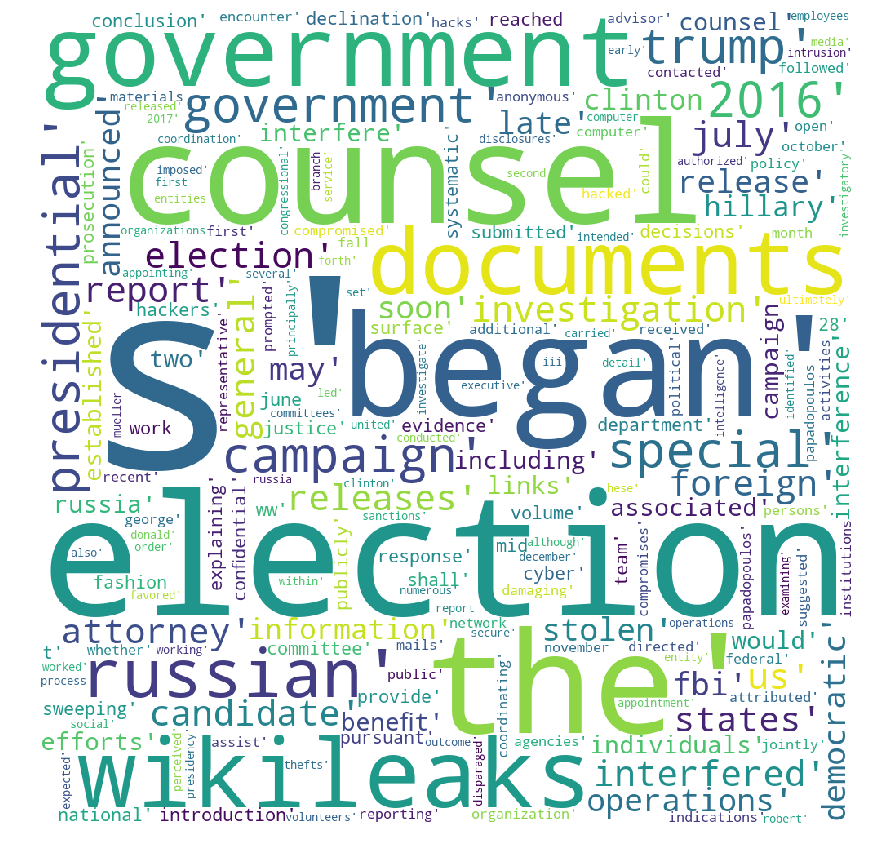

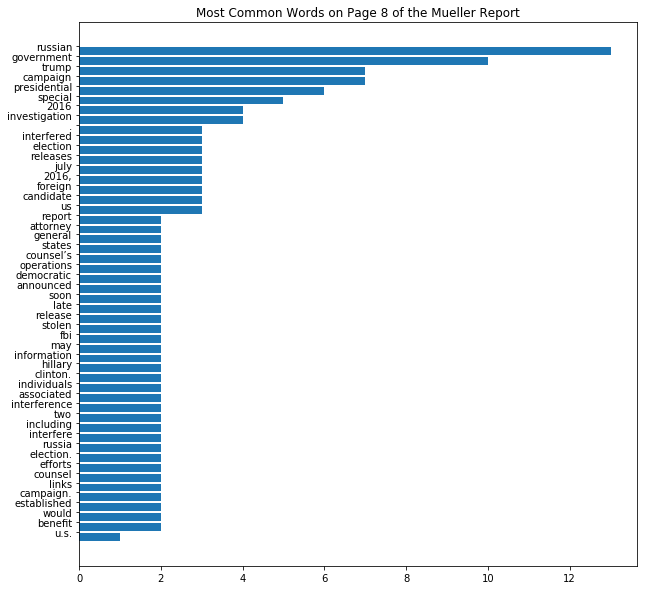

In [4]:
# Plot WordCloud of page 8
plt.figure(figsize=(15,15))
wordCloudFunction(df.T,0,10000000)
plt.figure(figsize=(10,10))
wordBarGraphFunction(df.T,0,"Most Common Words on Page 8 of the Mueller Report")

**All the words which are redundantly involved in this page points towards only trump getting impeached.**

![](https://lawfare.s3-us-west-2.amazonaws.com/staging/s3fs-public/barr_wh_0_2.jpg)

**I bet all Democrats would have seen this a long way before it's being discussed.**

# Let's import the CSV file, analyze it deeply and holistically

In [5]:
df = pd.read_csv('../input/mueller_report.csv')
df.head()

,page,line,text
0,1,1,U.S. Department of Justice
1,1,2,"AttarAe:,c\\'erlc Predtiet // Mtt; CeA1:ttiA"
2,1,3,Ma1:ertalPrn1:eetedUAder Fed. R. Crhtt. P. 6(e)
3,1,4,Report On The Investigation Into
4,1,5,Russian InterferenceIn The


**Apply all NLP fundamental steps in order to get the clean text as PDF reading is a bit clumsy.**

In [6]:
df2 = df.groupby('page')['text'].apply(lambda text: ''.join(text.to_string(index=False))).str.replace('(\\n)', '').reset_index()
df2.head()

,page,text
0,1,"U.S. Department of Justice AttarAe:,c\\'erlc Predtiet // Mtt; CeA1:ttiAMa1:ertalPrn1:eetedUAder Fed. R. Crhtt. P. 6(e) Report On The Investigation Into Russian InterferenceIn The 2016 PresidentialElection Volume I of II Special Counsel Robert S. Mueller, III Submitted Pursuant to 28 C.F.R. § 600.8(c) Washington, D.C. March 2019..."
1,2,U.S. Department of JusticeAtl6rney W6rk Pr6d1:1et// May C6ntain MEtterial Pr6teeted Under Fed . R. Criffl. P. 6(e) NaN
2,3,"U.S. Department of Justice At:t:ef'fle)'Werle Predttet /,' Ma;· CeHtail'lMaterial Preteeted UHder Fed. R. Crim. P. 6(e) TABLE OF CONTENTS - VOLUME I INTRODUCTION TO VOLUME I ......... ....................................................... ............ .............................. 1 EXECU..."
3,4,"U.S. Department of Justice MterHey Werk Pretittet // Ma,· Cel'ltail'IMaterial Preteeteti UH:tierFee. R. Crim. P. 6(e) c. The GRU ' s Transfer of Stolen Materials to WikiLeaks ........... ....................... 45 d. · WikiLeaks Statements Dissembling About the Source of Stolen Materials ......................................... ............."
4,5,"U.S. Department of Justice Wet'k Pt'etlttet /I Ma:y CeHtttiHMat:ef'ittlPreteetetl UHtler Fee. R. Crim. P. 6(e) At-1:effley d. George Papadopoulos Learns That Russia Has ""Dirt"" in the Form of Clinton Emails ............. ....... ..............."


# Removal of punctuation and lowering of strings

In [7]:
# Transform string data and remove punctuation
df2['text'] = df2.text.apply(lambda x: x.lower())
df2['text'] = df2.text.apply(lambda x: ''.join([c for c in x if c not in punctuation]))

In [8]:
df2.head()

,page,text
0,1,us department of justice attaraecerlc predtiet mtt cea1ttiama1ertalprn1eeteduader fed r crhtt p 6e report on the investigation into russian interferencein the 2016 presidentialelection volume i of ii special counsel robert s mueller iii submitted pursuant to 28 cfr § 6008c washington dc march 2019 ...
1,2,us department of justiceatl6rney w6rk pr6d11et may c6ntain metterial pr6teeted under fed r criffl p 6e nan
2,3,us department of justice attefflewerle predttet ma· cehtaillmaterial preteeted uhder fed r crim p 6e table of contents volume i introduction to volume i 1 executive summary to volume 1 4 i the special counsels investigation 11ii russian ac...
3,4,us department of justice mterhey werk pretittet ma· celltailimaterial preteeteti uhtierfee r crim p 6e c the gru s transfer of stolen materials to wikileaks 45 d · wikileaks statements dissembling about the source of stolen materials 48c additional gru cyber operations 49 ...
4,5,us department of justice wetk ptetlttet i may cehtttihmatefittlpreteetetl uhtler fee r crim p 6e at1effley d george papadopoulos learns that russia has dirt in the form of clinton emails 86 ...


# Stopwords and tokenization

In [9]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

df2['text'] = df2.text.apply(lambda x: word_tokenize(x))

df2['text'] = df2.text.apply(lambda x: [w for w in x if w not in stop_words])

df2['text'] = df2.text.apply(lambda x: ' '.join(x))

In [10]:
df2.head()

,page,text
0,1,us department justice attaraecerlc predtiet mtt cea1ttiama1ertalprn1eeteduader fed r crhtt p 6e report investigation russian interferencein 2016 presidentialelection volume ii special counsel robert mueller iii submitted pursuant 28 cfr § 6008c washington dc march 2019 nan
1,2,us department justiceatl6rney w6rk pr6d11et may c6ntain metterial pr6teeted fed r criffl p 6e nan
2,3,us department justice attefflewerle predttet ma· cehtaillmaterial preteeted uhder fed r crim p 6e table contents volume introduction volume 1 executive summary volume 1 4 special counsels investigation 11ii russian active measures social media campaign 14 structure internet research agency 15 b funding oversight concord prigozhin 16 c ira targets us elections 19 1 ira ramps us operations early 2014 19 2 us operations iracontrolled social media accounts 22 3 us operations facebook 24 4 us ope...
3,4,us department justice mterhey werk pretittet ma· celltailimaterial preteeteti uhtierfee r crim p 6e c gru transfer stolen materials wikileaks 45 · wikileaks statements dissembling source stolen materials 48c additional gru cyber operations 49 l summer fall 2016 operations targeting democratlinked victims 49 2 intrusions targeting administration u elections 50 trump campaign dissemination hacked materials 51 l 51 background 51 b contacts campaign wikileaks 52 c harm ongoing matter 54 wikileak...
4,5,us department justice wetk ptetlttet may cehtttihmatefittlpreteetetl uhtler fee r crim p 6e at1effley george papadopoulos learns russia dirt form clinton emails 86 e russiarelated communications campaign 89 f trump campaign knowledge dirt 93 g additional george papadopoulos contact 94 3 carter page 9 5 background 96 b origins early campaign work 97 c carter pages july 2016 trip moscow 98 later campaign work removal campaign 102 4 dimitri simes center national interest 103 cni dimitri simes c...


# Cleaning useless words  

In [11]:
def clean_text(text):
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"nan", " ", text)
    text = re.sub(r"name", " ", text)
    text = re.sub(r"dtype", " ", text)
    text = re.sub(r"object", " ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [12]:
df2['text'] = df2['text'].map(lambda com : clean_text(com))
df2['text'][15]

'us department justice atterttey nerk prndttet mtty cetttttitt moterisl preteeted uttder fed r crim p 6e national security agencythat concluded high confidence russia intervened election variety means assist trumps candidacy harm clinton declassified version assessment publicly released day midjanuary 2017 early february 2017 three congressional committees house permanent select committee intelligence hpsci senate select committee intelligence ssci senate judiciary committee sjcannounced would conduct inquiries already conducting inquiries russian interference election thenfbi director james comey later confirmed congress existence fbis investigation russian interference begun election march 20 2017 opensession testimony hpsci comey stated authorized department justice confirm fbi part counterintelligence mission investigating russian governments efforts interfere 2016 presidential election includes investigating nature links individuals associated trump campaign russian government whe

# Unique words and common words

In [13]:
from collections import Counter

text = ' '.join(df2['text'].tolist())
review_word = text.split(' ')
all_reviews = ' '.join(review_word)
words = all_reviews.split()

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints = []
for review in review_word:
    reviews_ints.append([vocab_to_int[word] for word in review.split()])

In [14]:
print('Unique words: ', len((vocab_to_int)))

Unique words:  14419


In [15]:
counts.most_common(20)

[('president', 1863),
 ('302', 1663),
 ('trump', 1424),
 ('us', 909),
 ('campaign', 821),
 ('2016', 819),
 ('cohen', 758),
 ('russian', 751),
 ('justice', 636),
 ('investigation', 623),
 ('russia', 620),
 ('flynn', 597),
 ('2017', 591),
 ('office', 582),
 ('meeting', 578),
 ('would', 578),
 ('department', 571),
 ('email', 522),
 ('comey', 517),
 ('mcgahn', 513)]

# Wordcloud of the whole report 

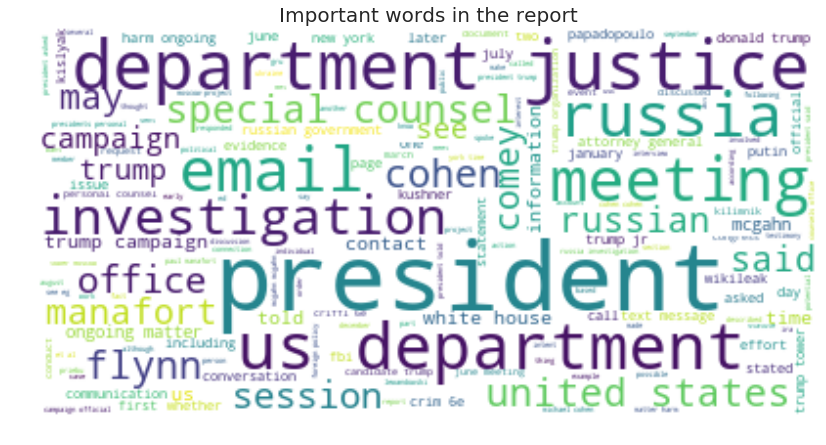

In [16]:
np.random.seed(321)
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(df2['text'].tolist())

wordcloud = WordCloud(background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Important words in the report',size=20)
plt.show()

**William Barr's facial expression tells us all we need to know about how badly this report has hit republicans**

![](https://static.politico.com/dims4/default/b8f7d7c/2147483647/resize/1160x%3E/quality/90/?url=https%3A%2F%2Fstatic.politico.com%2F3d%2F56%2F5459ab4140b7aeedab93ceb7a37e%2F190503-bill-barr-gty-773.jpg)

# Text expolaration through SpaCy 

In [17]:
import spacy
nlp = spacy.load('en')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

In [18]:
for i in range(15,40):
    one_sentence = df2['text'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)

/opt/conda/lib/python3.6/runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



In [19]:
for i in ['en_core_web_sm','en_core_web_lg']:
    nlp = spacy.load(i)
    print('This is model:',i)
    for i in range(17,22):
        one_sentence = df2['text'][i]
        doc = nlp(one_sentence)
        spacy.displacy.render(doc, style='ent',jupyter=True)

This is model: en_core_web_sm


This is model: en_core_web_lg


# Topic Modelling

In [20]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [21]:
# Storing the entire training text in a list
text = list(df2.text.values)
# Calling our overwritten Count vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

In [22]:
feature_names = tf_vectorizer.get_feature_names()
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='Jet',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[-100:],
            y = y[-100:],
            marker= dict(colorscale='Portland',
                         color = y[-100:]
                          ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Bottom 100 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [23]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [24]:
##
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=11, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [25]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

# Top topics

In [26]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:ongoing harm matter 2016 ira twitter account facebook email iracontrolled people million 6e 2018 trump sm2230634 clinton page 302 event content instagram rally election approximately state contact social post serial campaign medium justice time 14 18 russian posted prigozhin meeting

Topic #1:network gru dccc dnc computer officer netyksho unit access indictment guccifer technique 26165 investigative server 2016 dcleakscom persona stolen used document dcleaks data victim intrusion archive private employee website malware account grucontrolled clinton blog software file gained 20 tool hacking

Topic #2:loi trump sale million schedule receive residential russian campaign jr 250 email page class plus information 2016 boy fbi billion 325 commercial office hotel 320 stage 324 manage goldstone 323 321 326 322 327 operating special june organization government counsel

Topic #3:email wikileaks trump 2016 campaign kaveladze meeting russian russia twitter contact

In [27]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic = lda.components_[3]

In [28]:
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [tf_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]

# WordCloud of the first topic in Mueller's report 

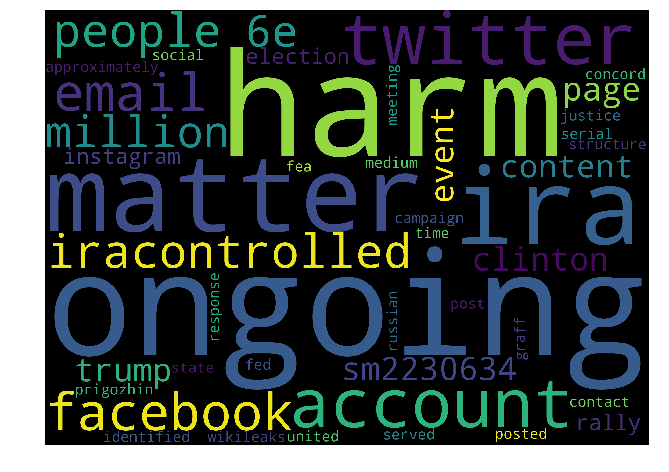

In [29]:
# Generating the wordcloud with the values under the category dataframe
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

In [30]:
df2['culprit'] = 'Donald Trump'

In [31]:
df2['helper'] = 'Putin'

# Generating Bi grams

In [32]:
def generate_ngrams(text, n=2):
    words = text.split()
    iterations = len(words) - n + 1
    for i in range(iterations):
       yield words[i:i + n]

In [33]:
# DataFrame for Mueller Bi grams
ngrams = {}
for title in df2[df2.culprit=="Donald Trump"]['text']:
        for ngram in generate_ngrams(title, 3):
            ngram = ' '.join(ngram)
            if ngram in ngrams:
                ngrams[ngram] += 1
            else:
                ngrams[ngram] = 1

ngrams_df = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_df.columns = ['count']
ngrams_df['culprit'] = 'Donald Trump'
ngrams_df.reset_index(level=0, inplace=True)

# Top 20 Bi gram counts and pairs

In [34]:
ngrams_df.sort_values(by='count', ascending=False).head(20)

,index,count,culprit
0,us department justice,395,Donald Trump
53,r crim p,193,Donald Trump
295,harm ongoing matter,176,Donald Trump
3094,united states v,176,Donald Trump
54,crim p 6e,174,Donald Trump
42,r criffl p,135,Donald Trump
43,criffl p 6e,116,Donald Trump
353,trump tower moscow,84,Donald Trump
5067,new york times,83,Donald Trump
50007,presidents personal counsel,74,Donald Trump


In [35]:
import json, random
import IPython.display
from IPython.core.display import display, HTML, Javascript
import json, random
from string import Template

# D3 graph visualization of trump and reported accusations

In [36]:
stopwords = {
"nodes": [
 {"id": "Donald Trump", "group": 1},
 {"id": "Putin", "group": 2},
 {"id": "us department justice"   , "group": 1},
 {"id": "are crime", "group": 1},
 {"id": "June meeting", "group": 1},
 {"id": "united states v", "group": 1},
 {"id": "r criffl p", "group": 1},
 {"id": "ongoing matter harm", "group": 1},
 {"id": "new york times", "group": 1},
 {"id": "fed the crime", "group": 1},
 {"id": "presidents personal counsel", "group": 1},
 {"id": "special counsels office", "group": 1},
 {"id": "are crime", "group": 2},
 {"id": "r criffl p", "group": 2},
 {"id": "ongoing matter harm", "group": 2},
 {"id": "trump tower moscow", "group": 2},
 {"id": "fed the crime", "group": 2},
 {"id": "June meeting", "group": 2},
 {"id": "committee th cong", "group": 2},
 {"id": "cohen cohen cohen", "group": 2},
 {"id": "tower moscow project", "group": 2},
 {"id": "donald j trump", "group": 2}
    ],
"links": [
 {"source": "Donald Trump", "target": "us department justice", "value": 1},
 {"source": "Donald Trump", "target":  "are crime", "value": 1},
 {"source": "Donald Trump", "target": "June meeting", "value": 1},
 {"source": "Donald Trump", "target": "united states v", "value": 1},
 {"source": "Donald Trump", "target": "r criffl p", "value": 1},
 {"source": "Donald Trump", "target": "ongoing matter harm", "value": 1},
 {"source": "Donald Trump", "target": "new york times", "value": 1},
 {"source": "Donald Trump", "target": "fed the crime", "value": 1},
 {"source": "Donald Trump", "target": "presidents personal counsel", "value": 1},
 {"source": "Donald Trump", "target": "special counsels office", "value": 1},
 {"source": "Putin", "target": "are crime", "value": 2},
 {"source": "Putin", "target": "r criffl p", "value": 2},
 {"source": "Putin", "target": "ongoing matter harm", "value": 2},
 {"source": "Putin", "target": "trump tower moscow", "value": 2},
 {"source": "Putin", "target": "fed the crime", "value": 2},
 {"source": "Putin", "target": "June meeting", "value": 2},
 {"source": "Putin", "target": "committee th cong", "value": 2},
 {"source": "Putin", "target": "cohen cohen cohen", "value": 2},
 {"source": "Putin", "target": "tower moscow project", "value": 2},
 {"source": "Putin", "target": "donald j trump", "value": 2}
    ]
}
with open('stopwords.json', 'w') as outfile:  
    json.dump(stopwords, outfile)

In [37]:
html_string = """
<!DOCTYPE html>
<meta charset="utf-8">
<style>

.links line {
  stroke: #999;
  stroke-opacity: 0.6;
}

.nodes circle {
  stroke: #fff;
  stroke-width: 3px;
}

text {
  font-family: sans-serif;
  font-size: 12px;
}

</style>
<svg width="960" height="500"></svg>
"""
js_string="""
 require.config({
    paths: {
        d3: "https://d3js.org/d3.v4.min"
     }
 });

  require(["d3"], function(d3) {

  var svg = d3.select("svg"),
    width = +svg.attr("width"),
    height = +svg.attr("height");

var color = d3.scaleOrdinal(d3.schemeCategory20);

var simulation = d3.forceSimulation()
    .force("link", d3.forceLink().distance(170).strength(0.5).id(function(d) { return d.id; }))
    .force("charge", d3.forceManyBody())
    .force("center", d3.forceCenter(width/2 , height/2 ));

d3.json("stopwords.json", function(error, graph) {
  if (error) throw error;

  var link = svg.append("g")
      .attr("class", "links")
    .selectAll("line")
    .data(graph.links)
    .enter().append("line")
      .attr("stroke-width", function(d) { return Math.sqrt(d.value); });

  var node = svg.append("g")
      .attr("class", "nodes")
    .selectAll("g")
    .data(graph.nodes)
    .enter().append("g")
    
  var circles = node.append("circle")
      .attr("r", 8)
      .attr("fill", function(d) { return color(d.group); })
      .call(d3.drag()
          .on("start", dragstarted)
          .on("drag", dragged)
          .on("end", dragended));

  var lables = node.append("text")
      .text(function(d) {
        return d.id;
      })
      .attr('x', 6)
      .attr('y', 3);

  node.append("title")
      .text(function(d) { return d.id; });

  simulation
      .nodes(graph.nodes)
      .on("tick", ticked);

  simulation.force("link")
      .links(graph.links);

  function ticked() {
    link
        .attr("x1", function(d) { return d.source.x; })
        .attr("y1", function(d) { return d.source.y; })
        .attr("x2", function(d) { return d.target.x; })
        .attr("y2", function(d) { return d.target.y; });

    node
        .attr("transform", function(d) {
          return "translate(" + d.x + "," + d.y + ")";
        })
  }
});

function dragstarted(d) {
  if (!d3.event.active) simulation.alphaTarget(0.9).restart();
  d.fx = d.x;
  d.fy = d.y;
}

function dragged(d) {
  d.fx = d3.event.x;
  d.fy = d3.event.y;
}

function dragended(d) {
  if (!d3.event.active) simulation.alphaTarget(0);
  d.fx = null;
  d.fy = null;
}  
    
  });
 """
h = IPython.display.display(HTML(html_string))
j = IPython.display.Javascript(js_string)
IPython.display.display_javascript(j)

*Drag the nodes and edges to visualize i.e play with it*

**To be continued**